In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Reading in the previously pickled dataset and dropping any na values

In [2]:
data=pd.read_pickle('data\dataset')
pd.set_option('display.max_columns', None)
loc_id=data.dropna().reset_index()[['STCNTY']]
display(data.head(5))
display(loc_id.head())

,STCNTY,Date,F_THEME1,E_HH,E_CROWD,EPL_UNEMP,EPL_LIMENG,M_LIMENG,EPL_DISABL,M_HU,EP_UNEMP,EP_CROWD,EP_MOBILE,M_TOTPOP,EP_NOVEH,RPL_THEME4,ST,MP_MOBILE,EPL_MUNIT,SPL_THEME3,E_UNEMP,MP_AGE65,EP_SNGPNT,EPL_CROWD,MP_NOHSDP,M_NOHSDP,M_GROUPQ,M_AGE17,MP_LIMENG,EPL_GROUPQ,F_NOHSDP,MP_CROWD,E_DISABL,M_MUNIT,M_NOVEH,M_UNEMP,EP_LIMENG,F_TOTAL,E_GROUPQ,E_MOBILE,EPL_MOBILE,RPL_THEME1,F_AGE65,EP_AGE17,F_SNGPNT,MP_GROUPQ,EPL_AGE17,MP_UNINSUR,MP_AGE17,F_GROUPQ,MP_DISABL,E_SNGPNT,F_UNEMP,F_LIMENG,MP_UNEMP,M_HH,RPL_THEME2,M_CROWD,EP_UNINSUR,EPL_MINRTY,AREA_SQMI,EPL_SNGPNT,EPL_NOVEH,E_HU,SPL_THEME4,EP_MUNIT,E_MUNIT,FIPS,EP_GROUPQ,MP_MUNIT,EPL_AGE65,E_MINRTY,E_AGE17,F_THEME3,F_MOBILE,MP_MINRTY,MP_NOVEH,E_NOHSDP,EP_NOHSDP,M_SNGPNT,E_AGE65,F_NOVEH,SPL_THEME2,E_NOVEH,M_DISABL,RPL_THEMES,M_MOBILE,EPL_NOHSDP,E_TOTPOP,F_THEME2,F_CROWD,SPL_THEME1,F_DISABL,RPL_THEME3,F_AGE17,M_UNINSUR,MP_SNGPNT,SPL_THEMES,M_AGE65,F_MINRTY,M_MINRTY,E_LIMENG,F_MUNIT,EP_MINRTY,EP_AGE65,E_UNINSUR,E_DAYPOP,EP_DISABL,F_THEME4,geoid,year,xco2,yr_avg,adj_xco2,STATE,LOCATION,COUNTY,ST_ABBR,co2_1yr_change,co2_3yr_change,co2_1yr_pct_change,co2_3yr_pct_change
0,01001,2016,0.0,20800.0,254.0,0.3298,0.5355,163.3,0.7380,75.0,5.6,1.2,18.0,0.0,4.9,0.2881,1.0,1.7,0.6791,1.1694,1437.0,0.2,7.3,0.2477,1.2,445.0,163.0,34.0,0.3,0.1251,0.0,0.5,10009.0,329.9,242.0,277.0,0.8,0.0,490.0,4095.0,0.7268,0.3298,0.0,25.2,0.0,0.3,0.8313,1.2,0.1,0.0,1.6,1516.0,0.0,0.0,1.1,391.0,0.5568,104.5,8.9,0.6339,594.446120,0.3200,0.3298,22714.0,2.1086,4.6,1034.0,1001.0,0.9,1.5,0.1964,13386.0,13853.0,0.0,0.0,0.3,1.1,4528.0,12.4,267.0,7695.0,0.0,2.0856,1024.0,850.0,0.3773,379.0,0.4744,55049.0,0.0,0.0,1.4473,0.0,0.5976,0.0,649.0,1.3,6.8109,104.0,0.0,161.0,432.0,0.0,24.3,14.0,4852.0,40854.0,18.4,0.0,01001,2016,403.473623,403.399761,0.073862,ALABAMA,"Autauga County, Alabama",Autauga,AL,NaN,NaN,NaN,NaN
1,01001,2018,0.0,21115.0,299.0,0.2745,0.5113,205.9,0.7905,71.0,4.2,1.4,18.4,0.0,5.6,0.3741,1.0,2.0,0.6017,1.1449,1065.0,0.1,7.5,0.2964,1.3,475.0,161.0,32.0,0.4,0.1525,0.0,0.7,10465.0,308.7,272.0,257.0,0.8,0.0,546.0,4279.0,0.7408,0.3631,0.0,24.2,0.0,0.3,0.7529,0.9,0.1,0.0,1.3,1586.0,0.0,0.0,1.0,383.0,0.5810,142.3,7.1,0.6336,594.443459,0.3792,0.4846,23315.0,2.2760,3.8,886.0,1001.0,1.0,1.3,0.1850,13788.0,13369.0,0.0,0.0,0.1,1.3,4204.0,11.3,319.9,8050.0,0.0,2.1076,1191.0,729.0,0.4354,469.0,0.4397,55200.0,0.0,0.0,1.5403,0.0,0.5947,0.0,508.0,1.5,7.0688,75.0,0.0,59.0,426.0,0.0,25.0,14.6,3875.0,37301.0,19.3,0.0,01001,2018,407.631516,407.916993,-0.285477,ALABAMA,"Autauga County, Alabama",Autauga,AL,4.157892,NaN,0.010305,NaN
2,01001,2020,0.0,21559.0,339.0,0.1397,0.4736,229.0,0.6830,68.0,2.9,1.6,18.2,0.0,5.4,0.4309,1.0,1.8,0.6050,0.6337,736.0,0.2,7.5,0.4023,1.5,562.0,157.0,49.0,0.4,0.1569,0.0,0.8,9658.0,292.0,320.0,185.0,0.7,0.0,578.0,4313.0,0.7486,0.3838,0.0,23.6,0.0,0.3,0.6986,1.3,0.1,0.0,1.6,1608.0,0.0,0.0,0.7,366.0,0.7362,162.0,8.0,0.6337,594.455838,0.7922,0.4764,23697.0,2.3892,3.9,918.0,1001.0,1.0,1.2,0.1827,14479.0,13143.0,0.0,0.0,1.0,1.5,4273.0,11.3,302.0,8490.0,0.0,2.8301,1167.0,856.0,0.5130,440.0,0.5080,55639.0,0.0,0.0,2.1725,0.0,0.6337,0.0,725.0,1.4,8.0255,85.0,0.0,566.0,363.0,0.0,26.0,15.3,4345.0,41810.0,17.7,0.0,01001,2020,412.982466,412.896790,0.085676,Alabama,"Autauga County, Alabama",Autauga,AL,5.350950,9.508842,0.013127,0.023567
3,01003,2016,0.0,75149.0,958.0,0.4241,0.5282,489.6,0.3521,202.0,6.3,1.3,11.9,0.0,3.1,0.3324,1.0,0.9,0.9733,1.0535,5887.0,0.1,6.0,0.2639,0.7,974.0,443.0,0.0,0.3,0.3438,0.0,0.3,27390.0,936.9,342.0,674.0,0.8,1.0,2911.0,12829.0,0.5387,0.2881,0.0,22.2,0.0,0.2,0.4476,0.9,0.0,0.0,0.7,4494.0,0.0,0.0,0.7,1285.0,0.2057,219.1,11.8,0.5253,1589.807425,0.1493,0.0872,107579.0,2.2069,18.3,19711.0,1003.0,1.5,0.9,0.6437,33560.0,44270.0,0.0,0.0,0.1,0.5,13956.0,10.0,589.8,37338.0,0.0,1.5928,2303.0,1430.0,0.2757,935.0,0.2999,199510.0,0.0,0.0,1.3005,0.0,0.5294,0.0,1817.0,0.8,6.1538,79.0,0.0,245.0,1540.0,1.0,16.8,18.7,23255.0,197683.0,13.9,1.0,01003,2016,403.990220,403.399761,0.590459,ALABAMA,"Baldwin County, Alabama

,STCNTY
0,01001
1,01003
2,01005
3,01007
4,01009


In [3]:
avg_co2=data[['STCNTY','xco2']].groupby(['STCNTY'],as_index=False).mean().rename(columns= {'xco2':'avg_co2','STCNTY':'location'})
display(avg_co2.head())
print(len(data))
data=pd.merge(data,avg_co2,left_on='STCNTY',right_on='location')
print(len(data))
display(data.head())

,location,avg_co2
0,01001,408.029202
1,01003,408.385435
2,01005,408.201328
3,01007,408.029202
4,01009,408.114162


9419
9419


,STCNTY,Date,F_THEME1,E_HH,E_CROWD,EPL_UNEMP,EPL_LIMENG,M_LIMENG,EPL_DISABL,M_HU,EP_UNEMP,EP_CROWD,EP_MOBILE,M_TOTPOP,EP_NOVEH,RPL_THEME4,ST,MP_MOBILE,EPL_MUNIT,SPL_THEME3,E_UNEMP,MP_AGE65,EP_SNGPNT,EPL_CROWD,MP_NOHSDP,M_NOHSDP,M_GROUPQ,M_AGE17,MP_LIMENG,EPL_GROUPQ,F_NOHSDP,MP_CROWD,E_DISABL,M_MUNIT,M_NOVEH,M_UNEMP,EP_LIMENG,F_TOTAL,E_GROUPQ,E_MOBILE,EPL_MOBILE,RPL_THEME1,F_AGE65,EP_AGE17,F_SNGPNT,MP_GROUPQ,EPL_AGE17,MP_UNINSUR,MP_AGE17,F_GROUPQ,MP_DISABL,E_SNGPNT,F_UNEMP,F_LIMENG,MP_UNEMP,M_HH,RPL_THEME2,M_CROWD,EP_UNINSUR,EPL_MINRTY,AREA_SQMI,EPL_SNGPNT,EPL_NOVEH,E_HU,SPL_THEME4,EP_MUNIT,E_MUNIT,FIPS,EP_GROUPQ,MP_MUNIT,EPL_AGE65,E_MINRTY,E_AGE17,F_THEME3,F_MOBILE,MP_MINRTY,MP_NOVEH,E_NOHSDP,EP_NOHSDP,M_SNGPNT,E_AGE65,F_NOVEH,SPL_THEME2,E_NOVEH,M_DISABL,RPL_THEMES,M_MOBILE,EPL_NOHSDP,E_TOTPOP,F_THEME2,F_CROWD,SPL_THEME1,F_DISABL,RPL_THEME3,F_AGE17,M_UNINSUR,MP_SNGPNT,SPL_THEMES,M_AGE65,F_MINRTY,M_MINRTY,E_LIMENG,F_MUNIT,EP_MINRTY,EP_AGE65,E_UNINSUR,E_DAYPOP,EP_DISABL,F_THEME4,geoid,year,xco2,yr_avg,adj_xco2,STATE,LOCATION,COUNTY,ST_ABBR,co2_1yr_change,co2_3yr_change,co2_1yr_pct_change,co2_3yr_pct_change,location,avg_co2
0,01001,2016,0.0,20800.0,254.0,0.3298,0.5355,163.3,0.7380,75.0,5.6,1.2,18.0,0.0,4.9,0.2881,1.0,1.7,0.6791,1.1694,1437.0,0.2,7.3,0.2477,1.2,445.0,163.0,34.0,0.3,0.1251,0.0,0.5,10009.0,329.9,242.0,277.0,0.8,0.0,490.0,4095.0,0.7268,0.3298,0.0,25.2,0.0,0.3,0.8313,1.2,0.1,0.0,1.6,1516.0,0.0,0.0,1.1,391.0,0.5568,104.5,8.9,0.6339,594.446120,0.3200,0.3298,22714.0,2.1086,4.6,1034.0,1001.0,0.9,1.5,0.1964,13386.0,13853.0,0.0,0.0,0.3,1.1,4528.0,12.4,267.0,7695.0,0.0,2.0856,1024.0,850.0,0.3773,379.0,0.4744,55049.0,0.0,0.0,1.4473,0.0,0.5976,0.0,649.0,1.3,6.8109,104.0,0.0,161.0,432.0,0.0,24.3,14.0,4852.0,40854.0,18.4,0.0,01001,2016,403.473623,403.399761,0.073862,ALABAMA,"Autauga County, Alabama",Autauga,AL,NaN,NaN,NaN,NaN,01001,408.029202
1,01001,2018,0.0,21115.0,299.0,0.2745,0.5113,205.9,0.7905,71.0,4.2,1.4,18.4,0.0,5.6,0.3741,1.0,2.0,0.6017,1.1449,1065.0,0.1,7.5,0.2964,1.3,475.0,161.0,32.0,0.4,0.1525,0.0,0.7,10465.0,308.7,272.0,257.0,0.8,0.0,546.0,4279.0,0.7408,0.3631,0.0,24.2,0.0,0.3,0.7529,0.9,0.1,0.0,1.3,1586.0,0.0,0.0,1.0,383.0,0.5810,142.3,7.1,0.6336,594.443459,0.3792,0.4846,23315.0,2.2760,3.8,886.0,1001.0,1.0,1.3,0.1850,13788.0,13369.0,0.0,0.0,0.1,1.3,4204.0,11.3,319.9,8050.0,0.0,2.1076,1191.0,729.0,0.4354,469.0,0.4397,55200.0,0.0,0.0,1.5403,0.0,0.5947,0.0,508.0,1.5,7.0688,75.0,0.0,59.0,426.0,0.0,25.0,14.6,3875.0,37301.0,19.3,0.0,01001,2018,407.631516,407.916993,-0.285477,ALABAMA,"Autauga County, Alabama",Autauga,AL,4.157892,NaN,0.010305,NaN,01001,408.029202
2,01001,2020,0.0,21559.0,339.0,0.1397,0.4736,229.0,0.6830,68.0,2.9,1.6,18.2,0.0,5.4,0.4309,1.0,1.8,0.6050,0.6337,736.0,0.2,7.5,0.4023,1.5,562.0,157.0,49.0,0.4,0.1569,0.0,0.8,9658.0,292.0,320.0,185.0,0.7,0.0,578.0,4313.0,0.7486,0.3838,0.0,23.6,0.0,0.3,0.6986,1.3,0.1,0.0,1.6,1608.0,0.0,0.0,0.7,366.0,0.7362,162.0,8.0,0.6337,594.455838,0.7922,0.4764,23697.0,2.3892,3.9,918.0,1001.0,1.0,1.2,0.1827,14479.0,13143.0,0.0,0.0,1.0,1.5,4273.0,11.3,302.0,8490.0,0.0,2.8301,1167.0,856.0,0.5130,440.0,0.5080,55639.0,0.0,0.0,2.1725,0.0,0.6337,0.0,725.0,1.4,8.0255,85.0,0.0,566.0,363.0,0.0,26.0,15.3,4345.0,41810.0,17.7,0.0,01001,2020,412.982466,412.896790,0.085676,Alabama,"Autauga County, Alabama",Autauga,AL,5.350950,9.508842,0.013127,0.023567,01001,408.029202
3,01003,2016,0.0,75149.0,958.0,0.4241,0.5282,489.6,0.3521,202.0,6.3,1.3,11.9,0.0,3.1,0.3324,1.0,0.9,0.9733,1.0535,5887.0,0.1,6.0,0.2639,0.7,974.0,443.0,0.0,0.3,0.3438,0.0,0.3,27390.0,936.9,342.0,674.0,0.8,1.0,2911.0,12829.0,0.5387,0.2881,0.0,22.2,0.0,0.2,0.4476,0.9,0.0,0.0,0.7,4494.0,0.0,0.0,0.7,1285.0,0.2057,219.1,11.8,0.5253,1589.807425,0.1493,0.0872,107579.0,2.2069,18.3,19711.0,1003.0,1.5,0.9,0.6437,33560.0,44270.0,0.0,0.0,0.1,0.5,13956.0,10.0,589.8,37338.0,0.0,1.5928,2303.0,1430.0,0.2757,935.0,0.2999,199510.0,0.0,0.0,1.3005,0.0,0.5294,0.0,1817.0,0.8,6.1538,79.0,0.0,245.0,1540.0,1.0,16.8,18.7,23255.0,197683.0,13.9,1.0,01003,

In [4]:
final_df=data.dropna().reset_index()
print(final_df.shape)
display(final_df.head())

(3139, 125)


,index,STCNTY,Date,F_THEME1,E_HH,E_CROWD,EPL_UNEMP,EPL_LIMENG,M_LIMENG,EPL_DISABL,M_HU,EP_UNEMP,EP_CROWD,EP_MOBILE,M_TOTPOP,EP_NOVEH,RPL_THEME4,ST,MP_MOBILE,EPL_MUNIT,SPL_THEME3,E_UNEMP,MP_AGE65,EP_SNGPNT,EPL_CROWD,MP_NOHSDP,M_NOHSDP,M_GROUPQ,M_AGE17,MP_LIMENG,EPL_GROUPQ,F_NOHSDP,MP_CROWD,E_DISABL,M_MUNIT,M_NOVEH,M_UNEMP,EP_LIMENG,F_TOTAL,E_GROUPQ,E_MOBILE,EPL_MOBILE,RPL_THEME1,F_AGE65,EP_AGE17,F_SNGPNT,MP_GROUPQ,EPL_AGE17,MP_UNINSUR,MP_AGE17,F_GROUPQ,MP_DISABL,E_SNGPNT,F_UNEMP,F_LIMENG,MP_UNEMP,M_HH,RPL_THEME2,M_CROWD,EP_UNINSUR,EPL_MINRTY,AREA_SQMI,EPL_SNGPNT,EPL_NOVEH,E_HU,SPL_THEME4,EP_MUNIT,E_MUNIT,FIPS,EP_GROUPQ,MP_MUNIT,EPL_AGE65,E_MINRTY,E_AGE17,F_THEME3,F_MOBILE,MP_MINRTY,MP_NOVEH,E_NOHSDP,EP_NOHSDP,M_SNGPNT,E_AGE65,F_NOVEH,SPL_THEME2,E_NOVEH,M_DISABL,RPL_THEMES,M_MOBILE,EPL_NOHSDP,E_TOTPOP,F_THEME2,F_CROWD,SPL_THEME1,F_DISABL,RPL_THEME3,F_AGE17,M_UNINSUR,MP_SNGPNT,SPL_THEMES,M_AGE65,F_MINRTY,M_MINRTY,E_LIMENG,F_MUNIT,EP_MINRTY,EP_AGE65,E_UNINSUR,E_DAYPOP,EP_DISABL,F_THEME4,geoid,year,xco2,yr_avg,adj_xco2,STATE,LOCATION,COUNTY,ST_ABBR,co2_1yr_change,co2_3yr_change,co2_1yr_pct_change,co2_3yr_pct_change,location,avg_co2
0,2,01001,2020,0.0,21559.0,339.0,0.1397,0.4736,229.0,0.6830,68.0,2.9,1.6,18.2,0.0,5.4,0.4309,1.0,1.8,0.6050,0.6337,736.0,0.2,7.5,0.4023,1.5,562.0,157.0,49.0,0.4,0.1569,0.0,0.8,9658.0,292.0,320.0,185.0,0.7,0.0,578.0,4313.0,0.7486,0.3838,0.0,23.6,0.0,0.3,0.6986,1.3,0.1,0.0,1.6,1608.0,0.0,0.0,0.7,366.0,0.7362,162.0,8.0,0.6337,594.455838,0.7922,0.4764,23697.0,2.3892,3.9,918.0,1001.0,1.0,1.2,0.1827,14479.0,13143.0,0.0,0.0,1.0,1.5,4273.0,11.3,302.0,8490.0,0.0,2.8301,1167.0,856.0,0.5130,440.0,0.5080,55639.0,0.0,0.0,2.1725,0.0,0.6337,0.0,725.0,1.4,8.0255,85.0,0.0,566.0,363.0,0.0,26.0,15.3,4345.0,41810.0,17.7,0.0,01001,2020,412.982466,412.89679,0.085676,Alabama,"Autauga County, Alabama",Autauga,AL,5.350950,9.508842,0.013127,0.023567,01001,408.029202
1,5,01003,2020,0.0,84047.0,1280.0,0.2861,0.5150,486.0,0.3689,180.0,3.9,1.5,10.2,0.0,3.1,0.3612,1.0,0.7,0.9574,0.5022,4027.0,0.1,3.9,0.3600,0.9,1344.0,403.0,0.0,0.2,0.3157,0.0,0.4,30615.0,979.0,397.0,714.0,0.8,1.0,2954.0,11893.0,0.4885,0.3253,0.0,21.5,0.0,0.2,0.4077,0.9,0.0,0.0,0.7,3317.0,0.0,0.0,0.7,1143.0,0.2724,364.0,9.5,0.5022,1589.835294,0.1738,0.1257,116747.0,2.2473,16.7,19513.0,1003.0,1.4,0.8,0.6496,37334.0,46993.0,0.0,0.0,0.6,0.5,14823.0,9.5,547.0,44716.0,0.0,2.1150,2627.0,1565.0,0.3103,868.0,0.3647,218289.0,0.0,0.0,1.9853,0.0,0.5022,0.0,1932.0,0.6,6.8498,109.0,0.0,1363.0,1593.0,1.0,17.1,20.5,20501.0,218607.0,14.2,1.0,01003,2020,412.969150,412.89679,0.072360,Alabama,"Baldwin County, Alabama",Baldwin,AL,4.772215,8.978930,0.011691,0.022226,01003,408.385435
2,8,01005,2020,2.0,9322.0,350.0,0.8071,0.7460,205.0,0.7581,119.0,6.9,3.8,30.2,0.0,11.1,0.9949,1.0,2.8,0.2565,0.8962,649.0,0.1,11.0,0.8549,2.2,387.0,264.0,29.0,0.9,0.9513,1.0,2.1,4159.0,77.0,202.0,182.0,1.8,6.0,2910.0,3644.0,0.9427,0.9567,0.0,20.9,1.0,1.1,0.3316,1.4,0.1,1.0,1.4,1029.0,0.0,0.0,1.9,338.0,0.9453,192.0,10.7,0.8962,885.007618,0.9656,0.9456,12057.0,3.9510,1.4,170.0,1005.0,11.6,0.6,0.5216,13694.0,5222.0,0.0,1.0,1.1,2.1,4497.0,25.3,217.0,4777.0,1.0,3.3229,1039.0,287.0,0.9927,347.0,0.9688,25026.0,1.0,0.0,4.1100,0.0,0.8962,0.0,311.0,2.3,12.2801,16.0,0.0,266.0,433.0,0.0,54.7,19.1,2362.0,27133.0,18.8,3.0,01005,2020,412.966158,412.89679,0.069368,Alabama,"Barbour County, Alabama",Barbour,AL,4.932801,9.361689,0.012089,0.023195,01005,408.201328
3,11,01007,2020,0.0,7259.0,91.0,0.8485,0.3116,107.0,0.7101,82.0,7.4,1.3,31.9,0.0,6.6,0.8622,1.0,3.5,0.4402,0.6292,667.0,0.6,10.9,0.2759,2.6,414.0,221.0,0.0,0.5,0.8873,0.0,0.8,3748.0,112.0,226.0,260.0,0.4,2.0,1657.0,2943.0,0.9554,0.8008,0.0,20.5,1.0,1.0,0.2903,1.9,0.0,0.0,2.6,790.0,0.0,0.0,2.8,299.0,0.5512,58.0,9.1,0.6292,622.469288,0.9637,0.6556,9237.0,3.2144,2.5,228.0,1007.0,7.4,1.2,0.2623,5724.0,4584.0,0.0,1.0,0.7,3.1,3056.0,19.1,252.0,3676.0,0.0,2.5380,481.0,551.0,0.8078,327.0,0.8654,22374.0,1.0,0.0,3.4261,0.0,0.6292,0.0,387.0,3.4,9.8077,125.0,0.0,158.0,75.0,0.0,25.6,

Renaming columns to work with following code (dataset was originally a little different)

In [5]:
#rename columns to desciptive labels
data.rename(columns={'E_TOTPOP':'total_population', 'E_HU':'housing_units',
                             'E_HH':'num_households', 'E_UNEMP':'unemployment',
                            'RPL_THEME1':'socioeconomic',
                             'RPL_THEME2':'household_comp', 'RPL_THEME3':'minority_status', 'RPL_THEME4':'housing_type',
                             'RPL_THEMES':'overall_svi'}, inplace=True)
display(data.head(2))

,STCNTY,Date,F_THEME1,num_households,E_CROWD,EPL_UNEMP,EPL_LIMENG,M_LIMENG,EPL_DISABL,M_HU,EP_UNEMP,EP_CROWD,EP_MOBILE,M_TOTPOP,EP_NOVEH,housing_type,ST,MP_MOBILE,EPL_MUNIT,SPL_THEME3,unemployment,MP_AGE65,EP_SNGPNT,EPL_CROWD,MP_NOHSDP,M_NOHSDP,M_GROUPQ,M_AGE17,MP_LIMENG,EPL_GROUPQ,F_NOHSDP,MP_CROWD,E_DISABL,M_MUNIT,M_NOVEH,M_UNEMP,EP_LIMENG,F_TOTAL,E_GROUPQ,E_MOBILE,EPL_MOBILE,socioeconomic,F_AGE65,EP_AGE17,F_SNGPNT,MP_GROUPQ,EPL_AGE17,MP_UNINSUR,MP_AGE17,F_GROUPQ,MP_DISABL,E_SNGPNT,F_UNEMP,F_LIMENG,MP_UNEMP,M_HH,household_comp,M_CROWD,EP_UNINSUR,EPL_MINRTY,AREA_SQMI,EPL_SNGPNT,EPL_NOVEH,housing_units,SPL_THEME4,EP_MUNIT,E_MUNIT,FIPS,EP_GROUPQ,MP_MUNIT,EPL_AGE65,E_MINRTY,E_AGE17,F_THEME3,F_MOBILE,MP_MINRTY,MP_NOVEH,E_NOHSDP,EP_NOHSDP,M_SNGPNT,E_AGE65,F_NOVEH,SPL_THEME2,E_NOVEH,M_DISABL,overall_svi,M_MOBILE,EPL_NOHSDP,total_population,F_THEME2,F_CROWD,SPL_THEME1,F_DISABL,minority_status,F_AGE17,M_UNINSUR,MP_SNGPNT,SPL_THEMES,M_AGE65,F_MINRTY,M_MINRTY,E_LIMENG,F_MUNIT,EP_MINRTY,EP_AGE65,E_UNINSUR,E_DAYPOP,EP_DISABL,F_THEME4,geoid,year,xco2,yr_avg,adj_xco2,STATE,LOCATION,COUNTY,ST_ABBR,co2_1yr_change,co2_3yr_change,co2_1yr_pct_change,co2_3yr_pct_change,location,avg_co2
0,01001,2016,0.0,20800.0,254.0,0.3298,0.5355,163.3,0.7380,75.0,5.6,1.2,18.0,0.0,4.9,0.2881,1.0,1.7,0.6791,1.1694,1437.0,0.2,7.3,0.2477,1.2,445.0,163.0,34.0,0.3,0.1251,0.0,0.5,10009.0,329.9,242.0,277.0,0.8,0.0,490.0,4095.0,0.7268,0.3298,0.0,25.2,0.0,0.3,0.8313,1.2,0.1,0.0,1.6,1516.0,0.0,0.0,1.1,391.0,0.5568,104.5,8.9,0.6339,594.446120,0.3200,0.3298,22714.0,2.1086,4.6,1034.0,1001.0,0.9,1.5,0.1964,13386.0,13853.0,0.0,0.0,0.3,1.1,4528.0,12.4,267.0,7695.0,0.0,2.0856,1024.0,850.0,0.3773,379.0,0.4744,55049.0,0.0,0.0,1.4473,0.0,0.5976,0.0,649.0,1.3,6.8109,104.0,0.0,161.0,432.0,0.0,24.3,14.0,4852.0,40854.0,18.4,0.0,01001,2016,403.473623,403.399761,0.073862,ALABAMA,"Autauga County, Alabama",Autauga,AL,NaN,NaN,NaN,NaN,01001,408.029202
1,01001,2018,0.0,21115.0,299.0,0.2745,0.5113,205.9,0.7905,71.0,4.2,1.4,18.4,0.0,5.6,0.3741,1.0,2.0,0.6017,1.1449,1065.0,0.1,7.5,0.2964,1.3,475.0,161.0,32.0,0.4,0.1525,0.0,0.7,10465.0,308.7,272.0,257.0,0.8,0.0,546.0,4279.0,0.7408,0.3631,0.0,24.2,0.0,0.3,0.7529,0.9,0.1,0.0,1.3,1586.0,0.0,0.0,1.0,383.0,0.5810,142.3,7.1,0.6336,594.443459,0.3792,0.4846,23315.0,2.2760,3.8,886.0,1001.0,1.0,1.3,0.1850,13788.0,13369.0,0.0,0.0,0.1,1.3,4204.0,11.3,319.9,8050.0,0.0,2.1076,1191.0,729.0,0.4354,469.0,0.4397,55200.0,0.0,0.0,1.5403,0.0,0.5947,0.0,508.0,1.5,7.0688,75.0,0.0,59.0,426.0,0.0,25.0,14.6,3875.0,37301.0,19.3,0.0,01001,2018,407.631516,407.916993,-0.285477,ALABAMA,"Autauga County, Alabama",Autauga,AL,4.157892,NaN,0.010305,NaN,01001,408.029202


Functions for the cluster modeling and centroid visualization: dbscan + kmeans. And evaluation metrics: centroid summary, sse, silhouette score

In [6]:
# DBSCAN model
def fit_dbscan(df, epsilon, samples):
    dbscan_df = df.copy()
    dbscan = DBSCAN(eps = epsilon, min_samples = samples)
    dbscan.fit(dbscan_df)
    # add cluster labels to df
    dbscan_df['Cluster']=dbscan.labels_
    labels = dbscan.labels_
    n_clusters=len(set(dbscan.labels_)) - (1 if -1 in labels else 0)
    # measure silhouette score
    if n_clusters == 0:
            sil_dbscan_df = 0
    else:    
        sil_dbscan_df = metrics.silhouette_score(dbscan_df, labels)
    return dbscan_df, n_clusters, sil_dbscan_df

# Fit DBSCAN using multiple eps and sample values
def dbscan_test(eps_vals, min_sample_vals, df):

    epsilon = []
    m_samples = []
    sil_scores = []
    n_clusters = []

    for eps in eps_vals:
        for samples in min_sample_vals:
            model_df, cluster_num, sil_score = fit_dbscan(df, eps, samples)
            n_clusters.append(cluster_num)
            sil_scores.append(sil_score)
            epsilon.append(eps)
            m_samples.append(samples)
    
    return epsilon, m_samples, sil_scores, n_clusters, model_df

def centroid_summary(start, end, cluster_labels, init_df):
    
    clusters = ['Cluster {}'.format(i) for i in range(start, end)]
    memb =  pd.Series(cluster_labels, index=init_df.index)
    centroids_sum_mean = pd.DataFrame(0.0, index =  clusters,
                            columns = init_df.columns)
    centroids_sum_median = pd.DataFrame(0.0, index =  clusters,
                            columns = init_df.columns)
    
    for i in range(start, end):
        centroids_sum_mean.iloc[i] = init_df[memb==i].mean(axis=0)
        centroids_sum_median.iloc[i] = init_df[memb==i].median(axis=0)
    
    return centroids_sum_mean, centroids_sum_median

def kmeans_sse(df):
    repetitions = ['R{}'.format(i) for i in range(1,10)]

    SSE_results = pd.DataFrame(0.0, index = range(2,15),
                            columns= repetitions)

    for n_cluster in SSE_results.index:
        for col in SSE_results.columns:
            algort = KMeans(n_clusters=n_cluster, random_state=0).fit(df)
            SSE_results.at[n_cluster,col] = algort.inertia_
            # Inertia: Sum of distances of samples to their closest cluster center

    SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
    SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
    
    return SSE_results.sort_values('Mean')

def kmeans_sil_scores(df):
    repetitions = ['R{}'.format(i) for i in range(1,10)]

    SIL_results = pd.DataFrame( index = range(2,15),
                                columns= repetitions)


    for n_cluster in SIL_results.index:
        for col in SIL_results.columns:
            algort = KMeans(n_clusters=n_cluster, random_state=0).fit(df)
            SIL_results.at[n_cluster,col] = metrics.silhouette_score(df,algort.labels_)

    SIL_results['Mean'] = SIL_results[repetitions].mean(axis=1)
    SIL_results['Var'] = SIL_results[repetitions].var(axis=1)
    
    return SIL_results.sort_values('Mean',ascending=False)

def silhouette_score(df, labels):
    df_copy = df.copy()
    df_copy['Cluster'] = labels
    sil_score = metrics.silhouette_score(df_copy,labels)
    return sil_score, df_copy['Cluster'].value_counts()

subset the data and drop na values

In [7]:
df_tot_pct_change = data[['avg_co2', 
       #'total_population',
       #'housing_units',
       #'num_households',
       #'unemployment', 
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi', 
       'co2_3yr_pct_change']]

df_tot_pct_change = df_tot_pct_change.dropna(axis=0)

scale the data

In [8]:
scaler = StandardScaler()

scaled_df_tot_pct_change = df_tot_pct_change.copy()

scaled_df_tot_pct_change  = pd.DataFrame(scaler.fit_transform(scaled_df_tot_pct_change))

# rename columns
scaled_df_tot_pct_change.columns = df_tot_pct_change.columns

In [9]:
display(scaled_df_tot_pct_change.head())
scaled_df_tot_pct_change.describe()

,avg_co2,socioeconomic,household_comp,minority_status,housing_type,overall_svi,co2_3yr_pct_change
0,-0.141086,-0.402105,0.817798,0.467825,-0.238159,0.045659,0.024874
1,1.049355,-0.604801,-0.788354,0.013408,-0.479596,-0.656487,-1.298708
2,0.434118,1.582929,1.541917,1.374932,1.715502,1.707322,-0.342302
3,-0.141086,1.042753,0.177138,0.452275,1.255837,1.066835,0.024874
4,0.142830,0.262807,0.770354,-0.288961,-0.780612,0.048083,-0.398976


,avg_co2,socioeconomic,household_comp,minority_status,housing_type,overall_svi,co2_3yr_pct_change
count,3.139000e+03,3.139000e+03,3.139000e+03,3.139000e+03,3.139000e+03,3.139000e+03,3.139000e+03
mean,-2.178620e-13,1.991964e-16,-4.753551e-17,1.041254e-16,1.924056e-16,-4.979911e-17,8.511120e-16
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00
min,-4.209698e+00,-1.731928e+00,-1.731683e+00,-1.722016e+00,-1.730770e+00,-1.731354e+00,-3.262326e+00
25%,-5.710554e-01,-8.657065e-01,-8.659261e-01,-8.740015e-01,-8.659978e-01,-8.653635e-01,-6.934065e-01
50%,1.428301e-01,5.152626e-04,-1.208253e-03,-7.602637e-04,1.598995e-04,-4.120560e-04,-2.420991e-02
75%,6.563174e-01,8.650046e-01,8.667995e-01,8.674703e-01,8.654516e-01,8.654054e-01,6.469964e-01
max,3.800974e+00,1.731919e+00,1.731344e+00,1.733627e+00,1.733168e+00,1.732608e+00,5.757203e+00


# Modeling using averaged co2 over all years

## DBSCAN

Set range of parameters for tuning & run 

In [10]:
eps = np.linspace(1.0, 2.0, 5)
min_samples = list(range(5,11))
tot_pct_eps, tot_pct_samples, tot_pct_sil, tot_pct_n_clusters, tot_pct_dbscan_df = dbscan_test(eps, min_samples, scaled_df_tot_pct_change)

In [11]:
dbscan_tot_pct_change = pd.DataFrame(data={'Epsilon': tot_pct_eps, 'Min_samples': tot_pct_samples, 'Silhouette Scores': tot_pct_sil, 'Num of Clusters': tot_pct_n_clusters})

# Epsilon, Min_samples at max silhouette score
dbscan_tot_pct_change.loc[dbscan_tot_pct_change['Silhouette Scores'].idxmax()]

Epsilon              2.000000
Min_samples          5.000000
Silhouette Scores    0.409173
Num of Clusters      1.000000
Name: 24, dtype: float64

View performance by parameter selection

In [12]:
print(dbscan_tot_pct_change.to_string())

    Epsilon  Min_samples  Silhouette Scores  Num of Clusters
0      1.00            5           0.094657                5
1      1.00            6           0.156102                1
2      1.00            7           0.145245                1
3      1.00            8           0.136981                1
4      1.00            9          -0.038850                3
5      1.00           10          -0.035819                2
6      1.25            5           0.188850                2
7      1.25            6           0.189096                2
8      1.25            7           0.193356                2
9      1.25            8           0.248662                1
10     1.25            9           0.245081                1
11     1.25           10           0.242119                1
12     1.50            5           0.342035                1
13     1.50            6           0.342035                1
14     1.50            7           0.332775                1
15     1.50            8

Filter to see the results where the model resulted in clusters >= 3 and < 10 to help select the one that could be used to interpret results of clustering. 

In [13]:
dbscan_tot_pct_change[(dbscan_tot_pct_change['Num of Clusters'] >= 3) & (dbscan_tot_pct_change['Num of Clusters'] < 10)]

,Epsilon,Min_samples,Silhouette Scores,Num of Clusters
0,1.0,5,0.094657,5
4,1.0,9,-0.038850,3


Refit DBSCAN models using epsilon = 1.25, min_sample = 5 

In [14]:
dbscan_tot_pct_change_fin_1, tot_pct_change_cluster_num_1, tot_pct_change_sil_score_1 = fit_dbscan(scaled_df_tot_pct_change, 1.25, 5)

Cluster break down

In [15]:
dbscan_tot_pct_change_fin_1['Cluster'].value_counts()

Cluster
 0    3079
-1      52
 1       8
Name: count, dtype: int64

In [16]:
print(dbscan_tot_pct_change_fin_1.shape)
print(loc_id.shape)

(3139, 8)
(3139, 1)


In [18]:
#re-joining county id to clustered dataset for vizualization
dbscan_tot_pct_change_fin_1['STCNTY']=loc_id

dbscan_tot_pct_change_fin_1.to_pickle('data\dbscan_tot_pct_change_fin_1')

Centroid analyses of DBSCAN using temporal features

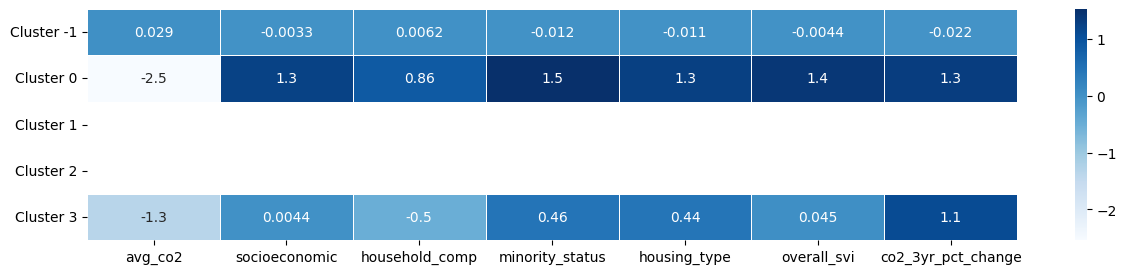

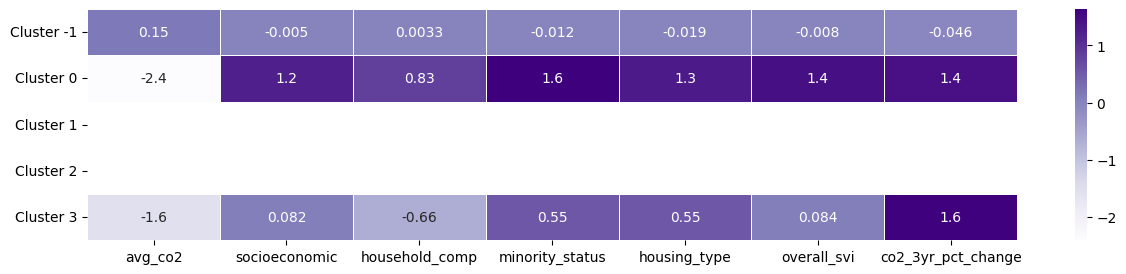

In [20]:
import seaborn as sns
tot_pct_change_centroid_sum_mean_1, tot_pct_change_centroid_sum_median_1 = centroid_summary(-1, 4, dbscan_tot_pct_change_fin_1['Cluster'], scaled_df_tot_pct_change)

plt.figure(figsize=(15,3))
sns.heatmap(tot_pct_change_centroid_sum_mean_1, linewidths=.5, annot=True, 
                    cmap='Blues')
plt.show()

plt.figure(figsize=(15,3))
sns.heatmap(tot_pct_change_centroid_sum_median_1, linewidths=.5, annot=True, 
                    cmap='Purples')
plt.show()

## Kmeans

In [21]:
# Sample of dataset to run SSE and silhouette score to select kmeans num of clusters
m = round(scaled_df_tot_pct_change.shape[0]*.5)
tot_pct_change_sample = scaled_df_tot_pct_change.sample(m, random_state=0)

C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

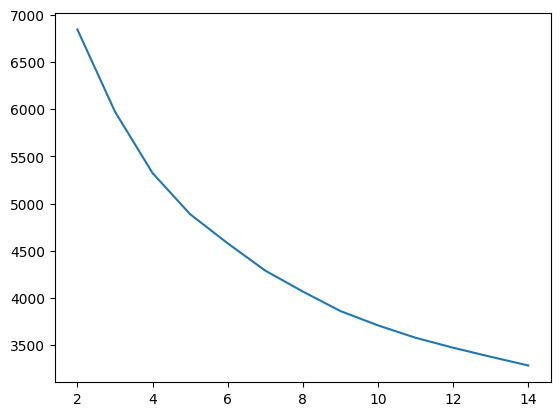

In [22]:
sse_tot_pct_results = kmeans_sse(tot_pct_change_sample)
(sse_tot_pct_results.Mean).plot()
plt.show()

C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

<Axes: >

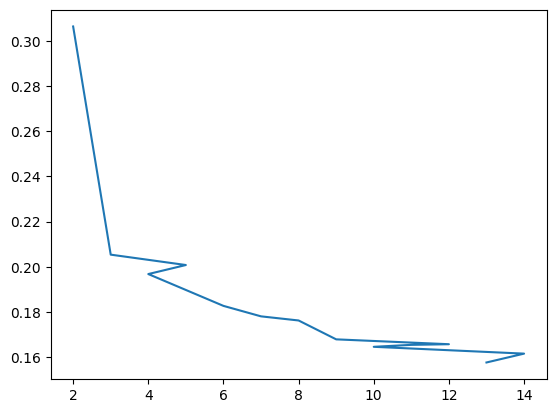

In [23]:
sil_tot_pct_results = kmeans_sil_scores(tot_pct_change_sample)
(sil_tot_pct_results.Mean).plot()

In [24]:
# Fit kmeans model for n_clusters = 4, n_clusters = 5, n_clusters = 6 on full dataset

kmeans_tot_pct_1 = KMeans(n_clusters=4, random_state=0).fit(scaled_df_tot_pct_change)
kmeans_tot_pct_2 = KMeans(n_clusters=5, random_state=0).fit(scaled_df_tot_pct_change)
kmeans_tot_pct_3 = KMeans(n_clusters=6, random_state=0).fit(scaled_df_tot_pct_change)

C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Calculate silhouette score of each model
kmeans_tot_avg_sil1, kmeans_tot_pct_clust_cnt_1 = silhouette_score(scaled_df_tot_pct_change, kmeans_tot_pct_1.labels_)
print('Silhouette score of kmeans model with n_clusters = 4: ' + str(kmeans_tot_avg_sil1))

kmeans_tot_avg_sil2, kmeans_tot_pct_clust_cnt_2 = silhouette_score(scaled_df_tot_pct_change, kmeans_tot_pct_2.labels_)
print('Silhouette score of kmeans model with n_clusters = 5: ' + str(kmeans_tot_avg_sil2))

kmeans_tot_avg_sil3, kmeans_tot_pct_clust_cnt_3 = silhouette_score(scaled_df_tot_pct_change, kmeans_tot_pct_3.labels_)
print('Silhouette score of kmeans model with n_clusters = 6: ' + str(kmeans_tot_avg_sil3))

Silhouette score of kmeans model with n_clusters = 4: 0.2930114569900985
Silhouette score of kmeans model with n_clusters = 5: 0.32752068190628214
Silhouette score of kmeans model with n_clusters = 6: 0.26718947638911605


In [26]:
# Count of points assigned to each cluster

# Kmeans, n_cluster = 4
kmeans_tot_pct_clust_cnt_1

Cluster
2    969
0    876
3    765
1    529
Name: count, dtype: int64

In [27]:
# Kmeans, n_cluster = 5
kmeans_tot_pct_clust_cnt_2

Cluster
0    896
1    606
4    591
2    575
3    471
Name: count, dtype: int64

In [28]:
# Kmeans, n_cluster = 6
kmeans_tot_pct_clust_cnt_3

Cluster
3    664
5    580
1    510
2    502
0    446
4    437
Name: count, dtype: int64

Exporting results for vizualization

In [29]:
results=kmeans_tot_pct_1.fit_predict(scaled_df_tot_pct_change)

#scaled_df_tot_pct_change_copy=scaled_df_tot_pct_change
#scaled_df_tot_pct_change_copy['Cluster']=results
#scaled_df_tot_pct_change_copy['STCNTY']=loc_id

final_df['Cluster']=results

final_df.to_pickle('data\kmeans_1')

C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroid analyses of kmeans using temporal features

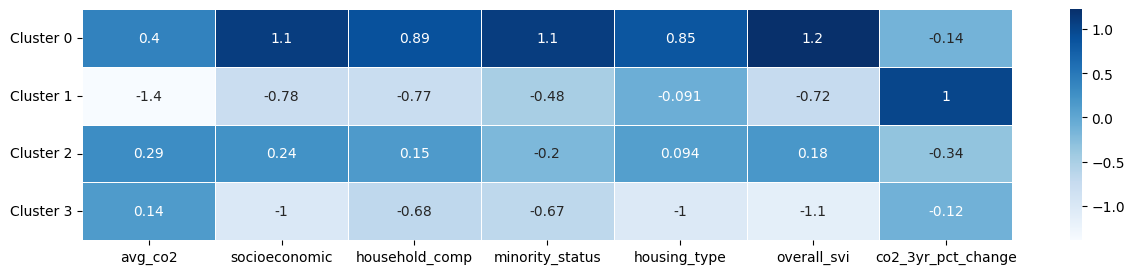

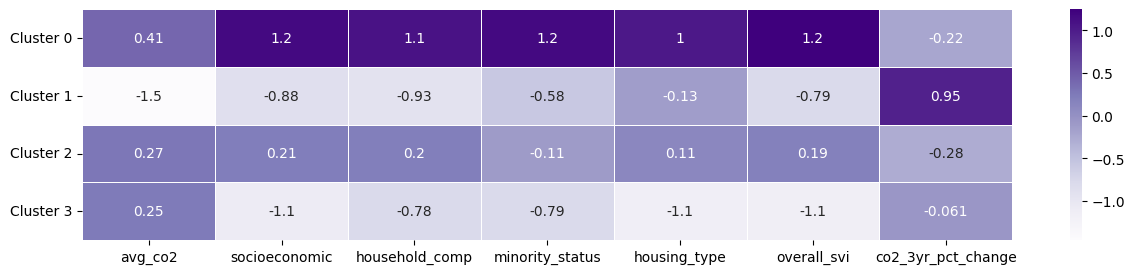

In [31]:
kmeans_tot_pct_centroid_sum_mean_1, kmeans_tot_pct_centroid_sum_median_1 = centroid_summary(0, 4, kmeans_tot_pct_1.labels_, scaled_df_tot_pct_change)

plt.figure(figsize=(15,3))
sns.heatmap(kmeans_tot_pct_centroid_sum_mean_1, linewidths=.5, annot=True, 
                    cmap='Blues')
plt.show()

plt.figure(figsize=(15,3))
sns.heatmap(kmeans_tot_pct_centroid_sum_median_1, linewidths=.5, annot=True, 
                    cmap='Purples')
plt.show()

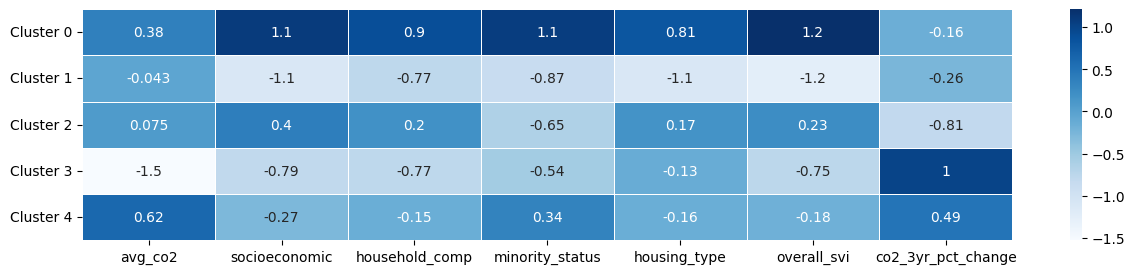

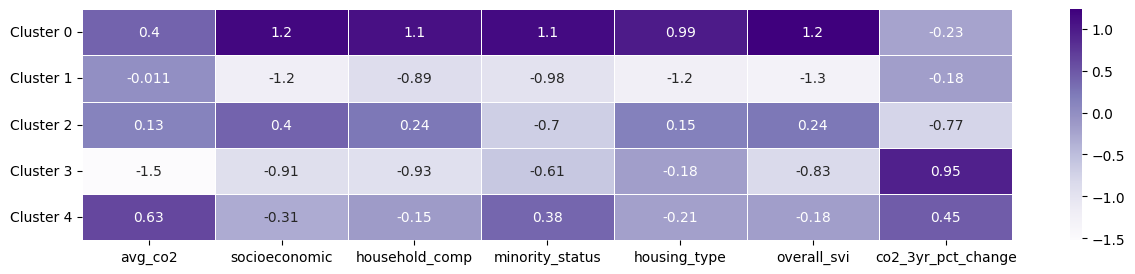

In [32]:
kmeans_tot_pct_centroid_sum_mean_2, kmeans_tot_pct_centroid_sum_median_2 = centroid_summary(0, 5, kmeans_tot_pct_2.labels_, scaled_df_tot_pct_change)

plt.figure(figsize=(15,3))
sns.heatmap(kmeans_tot_pct_centroid_sum_mean_2, linewidths=.5, annot=True, 
                    cmap='Blues')
plt.show()

plt.figure(figsize=(15,3))
sns.heatmap(kmeans_tot_pct_centroid_sum_median_2, linewidths=.5, annot=True, 
                    cmap='Purples')
plt.show()

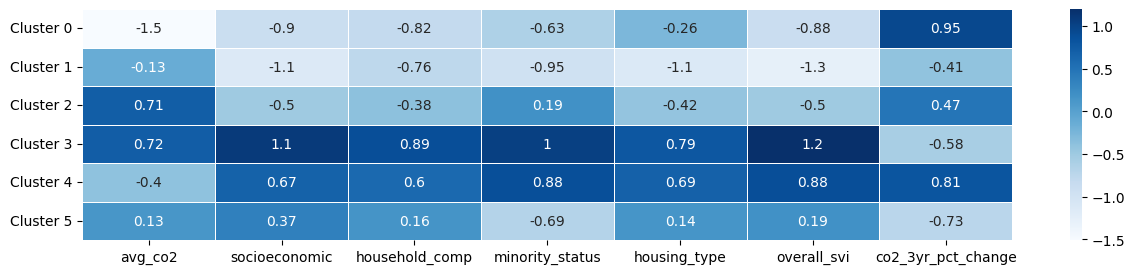

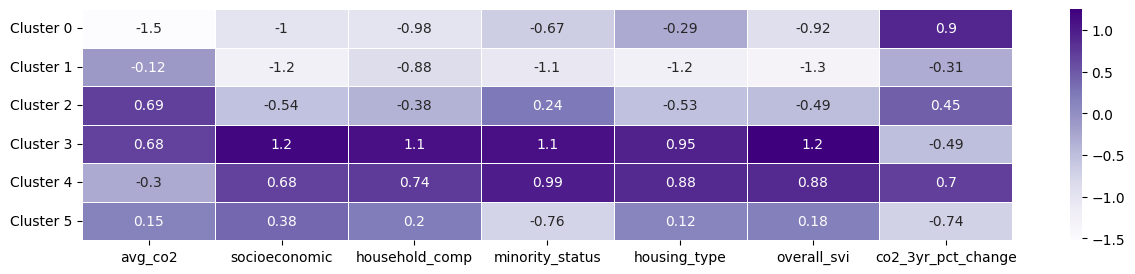

In [33]:
kmeans_tot_pct_centroid_sum_mean_3, kmeans_tot_pct_centroid_sum_median_3 = centroid_summary(0, 6, kmeans_tot_pct_3.labels_, scaled_df_tot_pct_change)

plt.figure(figsize=(15,3))
sns.heatmap(kmeans_tot_pct_centroid_sum_mean_3, linewidths=.5, annot=True, 
                    cmap='Blues')
plt.show()

plt.figure(figsize=(15,3))
sns.heatmap(kmeans_tot_pct_centroid_sum_median_3, linewidths=.5, annot=True, 
                    cmap='Purples')
plt.show()

## Calculating Davies-Bouldin Scoring for models with highest silhouette scores

In [35]:
from sklearn.metrics import davies_bouldin_score

# Davies-Boudin score for total percentage change in CO2 models
dbscan_tot_pct_dbscore = davies_bouldin_score(dbscan_tot_pct_change_fin_1, dbscan_tot_pct_change_fin_1['Cluster'])
print('DBSCAN Davies-Bouldin score for total percentage change in CO2 cluster model: ' + str(dbscan_tot_pct_dbscore))
kmeans_tot_pct_dbscore = davies_bouldin_score(scaled_df_tot_pct_change, kmeans_tot_pct_3.labels_)
print('K-means Davies-Bouldin score for total percentage change in CO2 cluster model: ' + str(kmeans_tot_pct_dbscore))

DBSCAN Davies-Bouldin score for total percentage change in CO2 cluster model: 6.255370968590469
K-means Davies-Bouldin score for total percentage change in CO2 cluster model: 1.6256366235903636


DBSCAN with functional data reductions

In [36]:
# Create subset of the data
fdr_subset = data[['STCNTY', 'year', 'avg_co2', 
                   'total_population',
       #'housing_units',
       #'num_households',
       #'unemployment',
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi']].dropna(axis=0).reset_index()
fdr_subset.drop(['index'], axis=1, inplace=True)

# Scale data
# initialize scaler
scaler = StandardScaler()

scaled_fdr_subset = fdr_subset.copy()

scaled_fdr_subset[['avg_co2',
                   #'total_population',
       #'housing_units',
       #'num_households',
       #'unemployment',
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi']] = scaler.fit_transform(scaled_fdr_subset[['avg_co2',
                                                                                                                      #'total_population',
       #'housing_units',
       #'num_households',
       #'unemployment',
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi']])

# Create pivot using multilevel indexing
scaled_fdr_subset = scaled_fdr_subset[['STCNTY', 'year', 'avg_co2',
                                       #'total_population',
       #'housing_units',
       #'num_households',
       #'unemployment',
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi']].pivot_table(index='STCNTY', columns='year')
#scaled_fdr_subset.index=scaled_fdr_subset.index.astype('int')
scaled_fdr_subset.head()


avg_co2                     household_comp                      \
year        2016      2018      2020           2016      2018      2020   
STCNTY                                                                    
01001  -0.136573 -0.136573 -0.136573       0.196946  0.280743  0.818151   
01003   1.036684  1.036684  1.036684      -1.018800 -1.042000 -0.787840   
01005   0.430327  0.430327  0.430327       1.328204  1.438317  1.542198   
01007  -0.136573 -0.136573 -0.136573      -1.377188 -1.314513  0.177555   
01009   0.143244  0.143244  0.143244      -0.116080 -0.627518  0.770713   

       housing_type                     minority_status                      \
year           2016      2018      2020            2016      2018      2020   
STCNTY                                                                        
01001     -0.733080 -0.435201 -0.238462        0.340461  0.330426  0.465389   
01003     -0.579638 -0.567515 -0.479883        0.104448 -0.219464  0.010320   
01005      1.494433  1.694289  1.715072        1.233989  1.233989  1.373797   
01007      0.576896  0.759087  1.255437        0.008936 -0.231576  0.449816   
01009     -1.098156 -1.127944 -0.780880        0.345998  0.319352 -0.292483   

       overall_svi                     socioeconomic                      
year          2016      2018      2020          2016      2018      2020  
STCNTY                                                                    
01001    -0.001585  0.004055  0.011587     -0.006195 -0.002962 -0.000953  
01003    -0.011447 -0.017223 -0.008088     -0.010242 -0.016542 -0.006631  
01005     0.057374  0.058461  0.058150      0.056608  0.056724  0.054657  
01007     0.017479  0.020061  0.040202      0.033554  0.036476  0.039524  
01009     0.010189  0.002967  0.011655      0.025944  0.021421  0.017674

In [37]:
# Create placehold dataframe to hold the calculated means and slopes
columns = ['avg_co2', #'total_population',
       #'housing_units',
       # 'num_households',
       # 'unemployment',
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi']
features = ['Mean','Slope']

my_column = pd.MultiIndex.from_product([features,columns],
                                     names=('features','columns'))

fdr_df = pd.DataFrame(index = scaled_fdr_subset.index,
                       columns=my_column)

fdr_df.head(5)

columns = ['avg_co2', #'total_population',
       #'housing_units',
       #'num_households',
       # 'unemployment',
       'socioeconomic',
       'household_comp', 'minority_status', 'housing_type', 'overall_svi']

for FIP in fdr_df.index:
    for col in columns:
        fdr_df.loc[FIP,('Mean',col)] = scaled_fdr_subset.loc[FIP,col].mean()
        fdr_df.loc[FIP,('Slope',col)] = scaled_fdr_subset.loc[FIP,col].diff().mean()

fdr_df.dropna(axis=0, inplace=True)
fdr_df.head()

features      Mean                                                            \
columns    avg_co2 socioeconomic household_comp minority_status housing_type   
STCNTY                                                                         
01001    -0.136573      -0.00337       0.431947        0.378759    -0.468915   
01003     1.036684     -0.011139      -0.949547       -0.034898    -0.542345   
01005     0.430327      0.055996        1.43624        1.280591     1.634598   
01007    -0.136573      0.036518      -0.838049        0.075725     0.863807   
01009     0.143244       0.02168       0.009038        0.124289    -1.002326   

features               Slope                                               \
columns  overall_svi avg_co2 socioeconomic household_comp minority_status   
STCNTY                                                                      
01001       0.004686     0.0      0.002621       0.310602        0.062464   
01003      -0.012253     0.0      0.001805        0.11548       -0.047064   
01005       0.057995     0.0     -0.000976       0.106997        0.069904   
01007       0.025914     0.0      0.002985       0.777372         0.22044   
01009       0.008271     0.0     -0.004135       0.443396        -0.31924   

features                           
columns  housing_type overall_svi  
STCNTY                             
01001        0.247309    0.006586  
01003        0.049877    0.001679  
01005        0.110319    0.000388  
01007        0.339271    0.011362  
01009        0.158638    0.000733

DBSCAN with functional data reduction

In [38]:
eps = np.linspace(1.0, 2.0, 5)
min_samples = list(range(5,11))
fdr_eps, fdr_samples, fdr_sil, fdr_n_clusters, fdr_dbscan_df = dbscan_test(eps, min_samples, fdr_df)

In [39]:
dbscan_fdr = pd.DataFrame(data={'Epsilon': fdr_eps, 'Min_samples': fdr_samples, 'Silhouette Scores': fdr_sil, 'Num of Clusters': fdr_n_clusters})

# Epsilon, Min_samples at max silhouette score
dbscan_fdr.loc[dbscan_fdr['Silhouette Scores'].idxmax()]
print(dbscan_fdr.to_string())

    Epsilon  Min_samples  Silhouette Scores  Num of Clusters
0      1.00            5           0.232217                2
1      1.00            6           0.236311                2
2      1.00            7           0.236699                2
3      1.00            8           0.434963                1
4      1.00            9           0.431660                1
5      1.00           10           0.415433                1
6      1.25            5           0.741430                1
7      1.25            6           0.741430                1
8      1.25            7           0.741430                1
9      1.25            8           0.683155                1
10     1.25            9           0.683155                1
11     1.25           10           0.683155                1
12     1.50            5           0.869560                1
13     1.50            6           0.869560                1
14     1.50            7           0.869560                1
15     1.50            8

In [42]:
dbscan_fdr[(dbscan_fdr['Num of Clusters'] >= 2) & (dbscan_fdr['Num of Clusters'] < 10)]

,Epsilon,Min_samples,Silhouette Scores,Num of Clusters
0,1.0,5,0.232217,2
1,1.0,6,0.236311,2
2,1.0,7,0.236699,2


In [43]:
dbscan_fdr_fin_1, fdr_cluster_num_1, fdr_sil_score_1 = fit_dbscan(fdr_df, 1.00, 7)
#dbscan_fdr_fin_2, fdr_cluster_num_2, fdr_sil_score_2 = fit_dbscan(fdr_df, 2.0, 5)

In [44]:
print(dbscan_fdr_fin_1['Cluster'].value_counts())
#print(dbscan_fdr_fin_2['Cluster'].value_counts())

Cluster
 0    3095
-1      38
 1       7
Name: count, dtype: int64


Kmeans with functional data reduction

In [45]:
# Sample of dataset to run SSE and silhouette score to select kmeans num of clusters
m = round(fdr_df.shape[0]*.5)
fdr_df_sample = fdr_df.sample(m, random_state=0)

C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

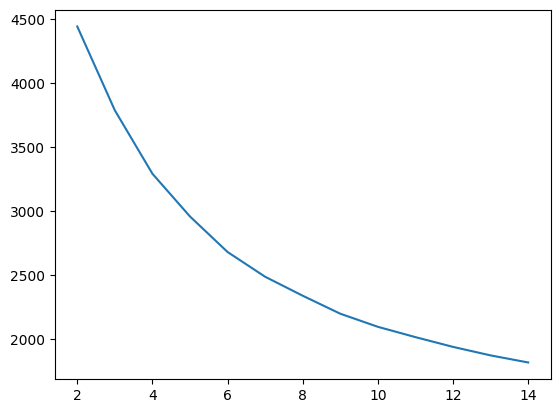

In [46]:
sse_fdr_results = kmeans_sse(fdr_df_sample)
(sse_fdr_results.Mean).plot()
plt.show()

In [47]:
# Fit kmeans model for n_clusters = 4, n_clusters = 5, n_clusters = 6 on full dataset
kmeans_fdr_1 = KMeans(n_clusters=4, random_state=0).fit(fdr_df)
kmeans_fdr_2 = KMeans(n_clusters=5, random_state=0).fit(fdr_df)
kmeans_fdr_3 = KMeans(n_clusters=6, random_state=0).fit(fdr_df)

C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# Calculate silhouette score of each model
kmeans_fdr_sil1, kmeans_fdr_clust_cnt_1 = silhouette_score(fdr_df, kmeans_fdr_1.labels_)
print('Silhouette score of kmeans model with n_clusters = 4: ' + str(kmeans_fdr_sil1))

kmeans_fdr_sil2, kmeans_fdr_clust_cnt_2 = silhouette_score(fdr_df, kmeans_fdr_2.labels_)
print('Silhouette score of kmeans model with n_clusters = 5: ' + str(kmeans_fdr_sil2))

kmeans_fdr_sil3, kmeans_fdr_clust_cnt_3 = silhouette_score(fdr_df, kmeans_fdr_3.labels_)
print('Silhouette score of kmeans model with n_clusters = 6: ' + str(kmeans_fdr_sil3))

Silhouette score of kmeans model with n_clusters = 4: 0.3908969734693342
Silhouette score of kmeans model with n_clusters = 5: 0.3545376166812171
Silhouette score of kmeans model with n_clusters = 6: 0.35540285684043915


In [49]:
# Count of points assigned to each cluster

# Kmeans, n_cluster = 4
kmeans_fdr_clust_cnt_1

Cluster
2    1236
0    1187
3     716
1       1
Name: count, dtype: int64

In [50]:
results=kmeans_fdr_1.fit_predict(fdr_df)
print(len(results))

3140


C:\Users\ddrye\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
fdr_df['Cluster']=results
display(fdr_df)
fdr_df.to_pickle('data\kmeans_2')


features      Mean                                                            \
columns    avg_co2 socioeconomic household_comp minority_status housing_type   
STCNTY                                                                         
01001    -0.136573      -0.00337       0.431947        0.378759    -0.468915   
01003     1.036684     -0.011139      -0.949547       -0.034898    -0.542345   
01005     0.430327      0.055996        1.43624        1.280591     1.634598   
01007    -0.136573      0.036518      -0.838049        0.075725     0.863807   
01009     0.143244       0.02168       0.009038        0.124289    -1.002326   
...            ...           ...            ...             ...          ...   
56037     0.229485     -0.013691      -0.359506        0.522028    -0.100029   
56039    -0.894343     -0.033791      -1.687675        0.655607     0.372075   
56041     0.969495     -0.006418       0.059016       -0.127297     0.593406   
56043    -0.822934     -0.000843       0.351728       -0.122106    -0.456214   
56045     -1.17422     -0.014555      -1.246068       -0.377729     0.588672   

features               Slope                                               \
columns  overall_svi avg_co2 socioeconomic household_comp minority_status   
STCNTY                                                                      
01001       0.004686     0.0      0.002621       0.310602        0.062464   
01003      -0.012253     0.0      0.001805        0.11548       -0.047064   
01005       0.057995     0.0     -0.000976       0.106997        0.069904   
01007       0.025914     0.0      0.002985       0.777372         0.22044   
01009       0.008271     0.0     -0.004135       0.443396        -0.31924   
...              ...     ...           ...            ...             ...   
56037      -0.001811     0.0      0.008634       0.104573       -0.249163   
56039      -0.025881     0.0      0.006348        0.02874       -0.391394   
56041       0.006889     0.0     -0.010959       0.096089       -0.254181   
56043       0.001657     0.0     -0.009634      -1.099228        0.032703   
56045       -0.01067     0.0      0.002698      -0.235809       -0.246395   

features                          Cluster  
columns  housing_type overall_svi          
STCNTY                                     
01001        0.247309    0.006586       0  
01003        0.049877    0.001679       0  
01005        0.110319    0.000388       2  
01007        0.339271    0.011362       2  
01009        0.158638    0.000733       0  
...               ...         ...     ...  
56037       -0.504663    -0.00033       2  
56039        0.368019    0.005606       3  
56041        0.060788   -0.006251       2  
56043       -0.345332   -0.015856       3  
56045         0.14409   -0.001922       3  

[3140 rows x 13 columns]

### For the purposes of making a choropleth

In [52]:
#trying something out
test=fdr_df['Cluster']
print(test)
final_df2=data.dropna().reset_index()

rejoined=pd.merge(final_df2, test, left_on=['STCNTY'], right_on=test.index)
rejoined.to_pickle('data\kmeans_2_v2')


STCNTY
01001    0
01003    0
01005    2
01007    2
01009    0
        ..
56037    2
56039    3
56041    2
56043    3
56045    3
Name: Cluster, Length: 3140, dtype: int32


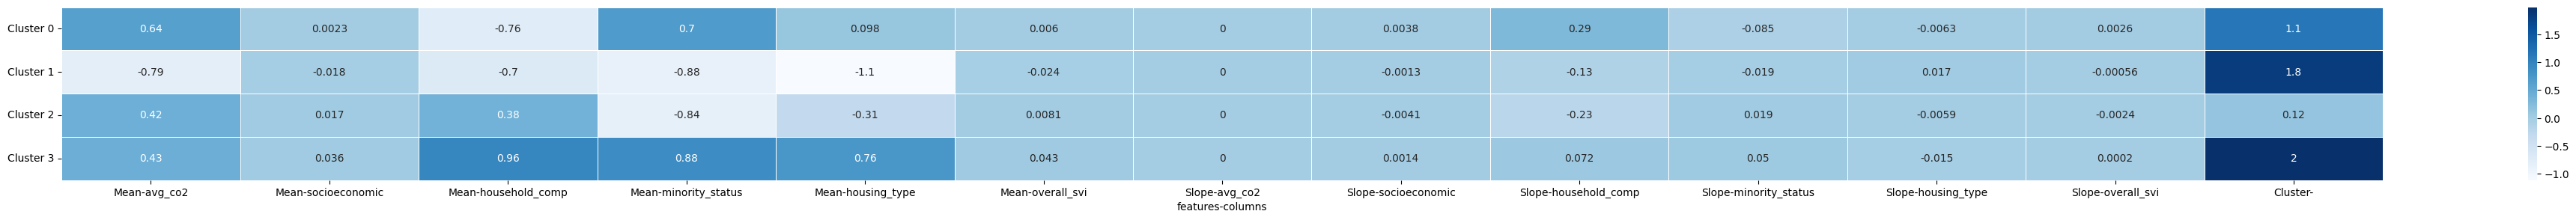

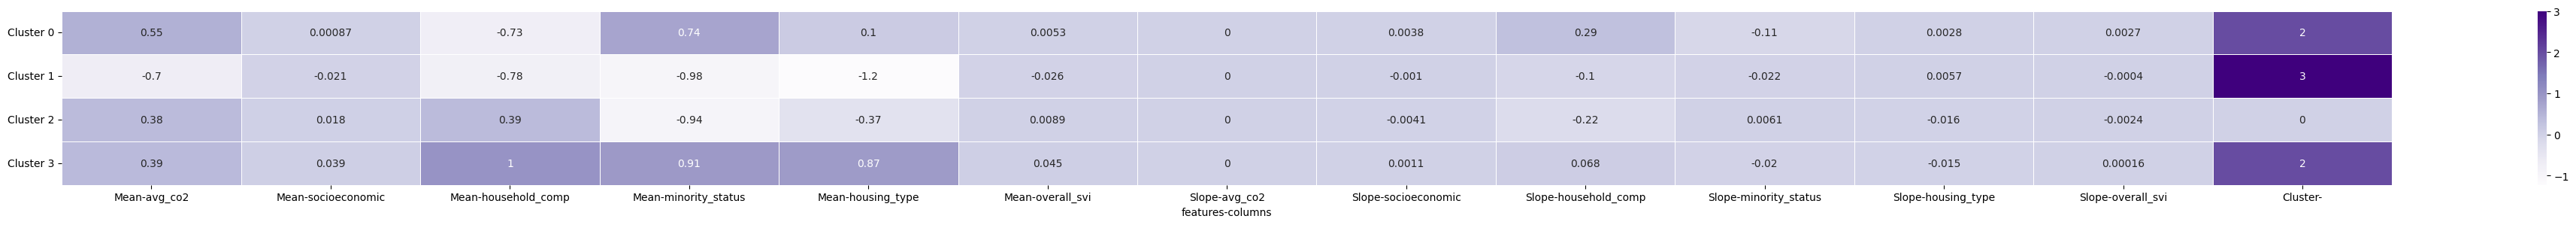

In [53]:
kmeans_fdr_centroid_sum_mean_1, kmeans_fdr_centroid_sum_median_1 = centroid_summary(0, 4, kmeans_fdr_3.labels_, fdr_df)

plt.figure(figsize=(50,3))
sns.heatmap(kmeans_fdr_centroid_sum_mean_1, linewidths=.5, annot=True, 
                    cmap='Blues')
plt.show()

plt.figure(figsize=(50,3))
sns.heatmap(kmeans_fdr_centroid_sum_median_1, linewidths=.5, annot=True, 
                    cmap='Purples')
plt.show()

In [55]:
# Davies-Boudin score for functional data reduction models
dbscan_fdr_dbscore = davies_bouldin_score(dbscan_fdr_fin_1, dbscan_fdr_fin_1['Cluster'])
print('DBSCAN Davies-Bouldin score for functional data reduction: ' + str(dbscan_fdr_dbscore))
kmeans_fdr_dbscore = davies_bouldin_score(fdr_df, kmeans_fdr_3.labels_)
print('K-means Davies-Bouldin score for functional data reduction: ' + str(kmeans_fdr_dbscore))

DBSCAN Davies-Bouldin score for functional data reduction: 2.133497965555026
K-means Davies-Bouldin score for functional data reduction: 1.2581122726612965
